# Policy Evaluation
## Rea Gianluca 278722

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

In [11]:
### Definitions gridsize, terminationStates, actions_dictionary, actions

In [2]:

gridsize = [16, 9]

terminationStates = [[4,0], [4,7], [12,0], [12,7]]

actions_dictionary = {
    "U":    [-1, 0],
    "D":    [1, 0],
    "R":    [0, 1],
    "L":    [0, -1],
    "W_R":  [0,0],
    "W_L":  [0,0],
    "W_D":  [0,0],
    "W_U":  [0,0],
    "P":    [4,0],
    "T_R":  [0,2],
    "T_L":  [0,-2]
}
#up, down, right, left, pick, travel (to right), travel (to left)

actions_ = {
    #(0,0):('D', 'R', 'L', 'U'),
    ### For eggs in pan
    (0,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1},
    (0,1): {'R': -1, 'L':-1, 'D':-1, 'W_U':-1},
    (0,2): {'R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (0,3): {'W_R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (0,5): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1},
    (0,6): {'R': -1, 'L': -1, 'D': -1, 'W_U': -1},
    (0,7): {'R': -1, 'L': -1, 'W_D': -1, 'W_U': -1},
    (0,8): {'W_R': -1, 'L': -1, 'W_D': -1, 'W_U': -1},

    (1,0): {'W_R': -1, 'W_L':-1, 'D': -1, 'W_U':-1, 'P':-1},
    (1,1): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (1,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (1,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (1,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1},
    (1,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},
    (1,7): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1, 'P': -1},
    (1,8): {'W_R': -1, 'L': -1, 'D': -1, 'W_U': -1},

    (2,0): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (2,1): {'R': -1, 'L': -1, 'W_D': -1, 'W_U':-1 },
    (2,2): {'R': -1, 'L':-1, 'D': -1, 'W_U': -1 },
    (2,3): {'W_R': -1, 'L':-1, 'D': -1, 'U': -1 },
    (2,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1},
    (2,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},
    (2,7): {'R': -1, 'W_L': -1, 'W_D': -1, 'U': -1},
    (2,8): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},

    (3,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1 },
    (3,1): {'R': -1, 'L': -1, 'W_D':-1, 'W_U':-1 },
    (3,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (3,3): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1 , 'T_R':-1 },
    (3,5): {'R': -1, 'W_L': -1, 'W_D':-1, 'U': -1 , 'T_L':-1 },
    (3,6): {'R': -1, 'L': -1, 'W_D':-1, 'U': -1 },
    (3,7): {'R': -1, 'L': -1, 'W_D':-1, 'W_U': -1 },
    (3,8): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1 },
    #(4,0): {'W_R': 0, 'W_L':0, 'W_D':0, 'W_U':0}, # SOL
    (4,1): {'R': -1, 'L':0, 'D':-1, 'W_U':-1},
    (4,2): {'R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (4,3): {'W_R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (4,5): {'R': -1, 'W_L': -1, 'D': -1, 'W_U':-1 },
    (4,6): {'R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (4,7): {'R': -1, 'L':-1, 'W_D':-1, 'W_U':-1},
    (4,8): {'W_R': -1, 'L': -1, 'W_D': -1, 'W_U':-1 },

    (5,0): {'W_R': -1, 'W_L':-1, 'D': -1, 'W_U':-1},
    (5,1): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (5,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (5,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (5,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1 },
    (5,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (5,7): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1 },
    (5,8): {'W_R': -1, 'L': -1, 'D': -1, 'W_U': -1 },

    (6,0): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (6,1): {'R': -1, 'L': -1, 'W_D': -1, 'W_U':-1 },
    (6,2): {'R': -1, 'L': -1, 'D': -1, 'W_U': -1 },
    (6,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (6,5): {'R': -1, 'W_L': -1, 'D': -1, 'U':-1 },
    (6,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (6,7): {'R': -1, 'W_L': -1, 'W_D': -1, 'U': -1 },
    (6,8): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },


    (7,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1 },
    (7,1): {'R': -1, 'L': -1, 'W_D':-1, 'W_U':-1 },
    (7,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (7,3): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1, 'T_R': -1 },
    (7,5): {'R': -1, 'W_L':-1, 'W_D':-1, 'U':-1, 'T_L': -1 },
    (7,6): {'R': -1, 'L': -1, 'W_D':-1, 'U':-1 },
    (7,7): {'R': -1, 'L': -1, 'W_D': -1, 'W_U': -1 },
    (7,8): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1},

    (8,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1},
    (8,1): {'R': -1, 'L':-1, 'D':-1, 'W_U':-1},
    (8,2): {'R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (8,3): {'W_R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (8,5): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1},
    (8,6): {'R': -1, 'L': -1, 'D': -1, 'W_U': -1},
    (8,7): {'R': -1, 'L': -1, 'W_D': -1, 'W_U': -1},
    (8,8): {'W_R': -1, 'L': -1, 'W_D': -1, 'W_U': -1},

    (9,0): {'W_R': -1, 'W_L':-1, 'D': -1, 'W_U':-1, 'P':-1},
    (9,1): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (9,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (9,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (9,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1},
    (9,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},
    (9,7): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1, 'P': -1},
    (9,8): {'W_R': -1, 'L': -1, 'D': -1, 'W_U': -1},

    (10,0): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (10,1): {'R': -1, 'L': -1, 'W_D': -1, 'W_U':-1 },
    (10,2): {'R': -1, 'L':-1, 'D': -1, 'W_U': -1 },
    (10,3): {'W_R': -1, 'L':-1, 'D': -1, 'U': -1 },
    (10,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1},
    (10,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},
    (10,7): {'R': -1, 'W_L': -1, 'W_D': -1, 'U': -1},
    (10,8): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1},

    (11,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1 },
    (11,1): {'R': -1, 'L': -1, 'W_D':-1, 'W_U':-1 },
    (11,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (11,3): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1 , 'T_R': -1},
    (11,5): {'R': -1, 'W_L': -1, 'W_D':-1, 'U': -1 , 'T_L': -1},
    (11,6): {'R': -1, 'L': -1, 'W_D':-1, 'U': -1 },
    (11,7): {'R': -1, 'L': -1, 'W_D':-1, 'W_U': -1 },
    (11,8): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1 },

    (12,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1}, # SOL
    (12,1): {'R': -1, 'L':-1, 'D':-1, 'W_U':-1},
    (12,2): {'R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (12,3): {'W_R': -1, 'L': -1, 'D': -1, 'W_U':-1 },
    (12,5): {'R': -1, 'W_L': -1, 'D': -1, 'W_U':-1 },
    (12,6): {'R': 0, 'L': -1, 'D': -1, 'W_U':-1 },
    (12,8): {'W_R': -1, 'L': 0, 'W_D': -1, 'W_U':-1 },

    (13,0): {'W_R': -1, 'W_L':-1, 'D': -1, 'W_U':-1},
    (13,1): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (13,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (13,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (13,5): {'R': -1, 'W_L': -1, 'D': -1, 'U': -1 },
    (13,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (13,7): {'R': -1, 'W_L': -1, 'D': -1, 'W_U': -1 },
    (13,8): {'W_R': -1, 'L': -1, 'D': -1, 'W_U': -1 },

    (14,0): {'R': -1, 'W_L':-1, 'W_D': -1, 'U': -1},
    (14,1): {'R': -1, 'L': -1, 'W_D': -1, 'W_U':-1 },
    (14,2): {'R': -1, 'L': -1, 'D': -1, 'W_U': -1 },
    (14,3): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (14,5): {'R': -1, 'W_L': -1, 'D': -1, 'U':-1 },
    (14,6): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },
    (14,7): {'R': -1, 'W_L': -1, 'W_D': -1, 'U': -1 },
    (14,8): {'W_R': -1, 'L': -1, 'D': -1, 'U': -1 },

    (15,0): {'R': -1, 'W_L':-1, 'W_D':-1, 'W_U':-1 },
    (15,1): {'R': -1, 'L': -1, 'W_D':-1, 'W_U':-1 },
    (15,2): {'R': -1, 'L': -1, 'W_D': -1, 'U': -1 },
    (15,3): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1, 'T_R': -1 },
    (15,5): {'R': -1, 'W_L':-1, 'W_D':-1, 'U':-1 , 'T_L': -1 },
    (15,6): {'R': -1, 'L': -1, 'W_D':-1, 'U':-1 },
    (15,7): {'R': -1, 'L': -1, 'W_D': -1, 'W_U': -1 },
    (15,8): {'W_R': -1, 'L': -1, 'W_D':-1, 'U': -1},

}

numIterations = 1000

### Utilities

In [3]:
def actionRewardFunction(initialPosition, action):

    finalPosition = (np.array(initialPosition) + np.array(actions_dictionary[action]))

    reward = actions_[tuple(initialPosition)][action]

    return finalPosition, reward

### Initialization

In [4]:
valueMap = np.zeros(gridsize)
print(valueMap)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Policy evaluation

In [5]:
def policy_evaluation_algorithm(gamma):

    print('gamma:', gamma)
    print()
    valueMap = np.zeros(gridsize)
    deltas = []
    for it in range(1000):
        copyValueMap = np.copy(valueMap)
        deltaState = []
        for state in actions_:
            weightedRewards = 0
            for action in actions_[state]:
                finalPosition, reward = actionRewardFunction(state, action)

                weightedRewards += (1/len(actions_[state]))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
            deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
            copyValueMap[state[0], state[1]] = weightedRewards
        deltas.append(deltaState)
        valueMap = copyValueMap


    return deltas, valueMap

In [26]:
deltas, valueMap = policy_evaluation_algorithm(0.9)
first_half = pd.DataFrame(valueMap[:4])
second_half = pd.DataFrame(valueMap[4:8])
second_half.index +=4
third_half = pd.DataFrame(valueMap[8:12],index =[8,9,10,11])
fourth_half = pd.DataFrame(valueMap[12:],index =[12,13,14,15])


gamma: 0.9



### Value function

In [27]:
print(first_half)
print()
print(second_half)

          0         1         2         3    4         5         6         7         8
0 -9.999951 -9.999929 -9.999891 -9.999837  0.0 -9.999974 -9.999978 -9.999987 -9.999991
1 -9.982850 -9.999913 -9.999859 -9.999710  0.0 -9.999958 -9.999963 -9.999374 -9.999642
2 -9.991242 -9.995742 -9.998350 -9.999306  0.0 -9.999918 -9.999937 -9.999642 -9.999751
3 -9.999711 -9.999583 -9.999269 -9.999549  0.0 -9.999822 -9.999902 -9.999902 -9.999858

          0         1         2         3    4         5         6         7         8
4  0.000000 -5.391603 -7.803449 -8.705827  0.0 -9.992029 -9.993433 -9.996252 -9.997405
5 -9.964930 -7.434294 -8.336672 -9.033016  0.0 -9.987084 -9.989098 -9.998491 -9.998156
6 -9.949344 -9.911243 -9.833695 -9.626780  0.0 -9.974382 -9.981933 -9.998156 -9.997001
7 -9.956200 -9.936734 -9.889149 -9.847752  0.0 -9.942744 -9.974290 -9.986766 -9.993359


In [28]:
print(third_half)
print()
print(fourth_half)

           0         1         2         3    4         5         6         7         8
8  -9.999984 -9.999976 -9.999964 -9.999946  0.0 -9.999939 -9.999943 -9.999967 -9.999977
9  -9.994986 -9.999971 -9.999953 -9.999904  0.0 -9.999908 -9.999896 -9.988223 -9.993318
10 -9.997436 -9.998746 -9.999498 -9.999769  0.0 -9.999847 -9.999793 -9.993318 -9.995444
11 -9.999904 -9.999861 -9.999757 -9.999803  0.0 -9.999773 -9.999543 -9.998860 -9.997670

           0         1         2         3    4         5         6         7         8
12 -9.995115 -9.992944 -9.989190 -9.983810  0.0 -7.487634 -5.443194  0.000000 -2.307692
13 -9.989751 -9.991391 -9.986011 -9.971235  0.0 -8.415467 -7.927812 -9.971490 -9.965155
14 -9.985195 -9.974060 -9.951396 -9.931100  0.0 -9.126716 -9.003804 -9.965155 -9.943332
15 -9.971324 -9.958580 -9.927426 -9.840047  0.0 -9.572751 -9.514131 -9.749895 -9.874502


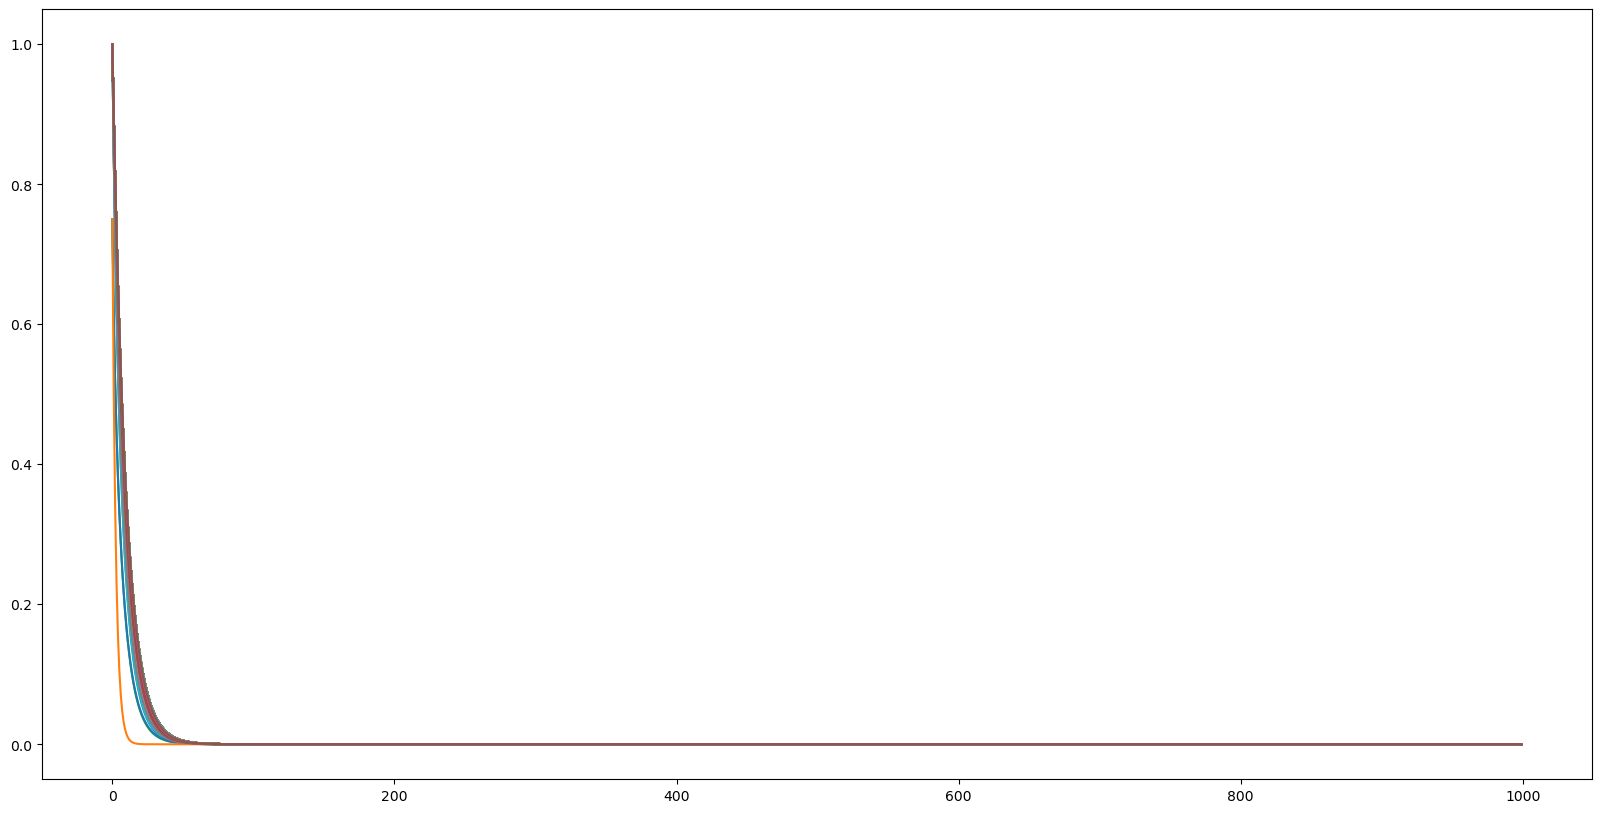

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)
plt.show()